# Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot  as plt
import seaborn as sns
import warnings
import datetime as dt
import calendar
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

Importing Data

In [ ]:
data = pd.read_csv('/content/OnlineRetail (1).csv', encoding = 'unicode_escape')

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Converting InvoiceDate from Object to Date format

In [ ]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Overview of Dataset

In [ ]:
print('No of Transaction: ', data['InvoiceNo'].nunique())
print('No of StockCode: ', data['StockCode'].nunique())
print('No of CustomerID: ', data['CustomerID'].nunique())
print('No of StockCode: ', data['StockCode'].nunique())

No of Transaction:  25900
No of StockCode:  4070
No of CustomerID:  4372
No of StockCode:  4070


Percentage of rows with Null as Customer ID

In [ ]:
print("Percentage of null Customer IDs", (data['CustomerID'].isnull().sum()/len(data['CustomerID']))*100,'%')

Percentage of null Customer IDs 24.926694334288598 %


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Percentage of Cancelled Orders

In [ ]:
print('Percentage of cancelled Orders :',"{:.2f}".format((data['InvoiceNo'].str.contains('C').sum()/data['InvoiceNo'].nunique() )*100),'%')


Percentage of cancelled Orders : 35.86 %


In [ ]:
cancelled_orders = data[data['InvoiceNo'].str.contains('C')]

In [ ]:
cancelled_orders[cancelled_orders['Quantity']==-80995.00]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


Graphs of Cancelled orders based on Country vs Quantity   and Country vs Unit Price

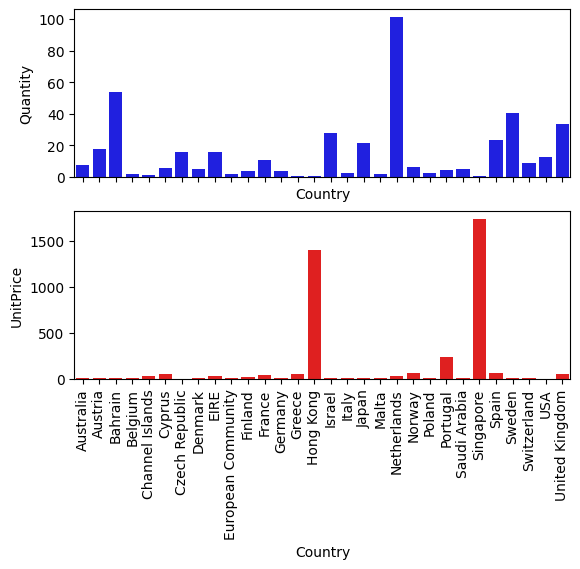

In [ ]:
cnc_quant_units = cancelled_orders.groupby('Country')['Quantity', 'UnitPrice'].mean()
cnc_quant_units.reset_index(inplace=True)
cnc_quant_units['Quantity']=cnc_quant_units['Quantity'].apply(lambda x : (-1 * x))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
sns.barplot(x=cnc_quant_units['Country'], y=cnc_quant_units['Quantity'], color='b',ax=ax1)
sns.barplot(x=cnc_quant_units['Country'], y=cnc_quant_units['UnitPrice'], color='r',ax=ax2)
plt.xticks(rotation=90)
plt.show()

Dropping Null Data

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.dropna(inplace=True)

Converting CustomerId to int type

In [ ]:
data['CustomerID'] = data['CustomerID'].astype(int)

Removing Cancelled orders and taking others into seperate Dataframe

In [ ]:
data1=data[data['Quantity'] >= 0]

In [ ]:
data1.shape

(397924, 8)

Creating new Columns Total Cost

In [ ]:
data1['total_cost']=data1['Quantity']*data1['UnitPrice']

Seperating Date column into Year, Month, Day

In [ ]:
data1['year']=data1['InvoiceDate'].apply(lambda x: x.year)
data1['month']=data1['InvoiceDate'].apply(lambda x: x.month)
data1['day']=data1['InvoiceDate'].apply(lambda x: x.day)

Important Functions for Date columns

In [ ]:
def get_time_of_day(time):
  time=time.hour
  if ((time == 6) or (time == 7) or (time == 8) or (time == 9) or (time ==10) or (time ==11)):
    return "Morning"
  elif ((time == 12) or (time == 1) or (time == 2) or (time == 3) or (time ==4) or (time ==5)):
    return "Afternoon"
  else:
    return "Evening"

def get_month(date):
  return calendar.month_name[date.month]

def get_weekday(date):
  if date.weekday() == 0:
    return "Monday"
  elif date.weekday() == 1:
    return "Tuesday"
  elif date.weekday() == 2:
    return "Wednesday"
  elif date.weekday() == 3:
    return "Thursday"
  elif date.weekday() == 4:
    return "Friday"
  elif date.weekday() == 5:
    return "Saturday"
  else:
    return "Sunday"

Extracting Month in string form

In [ ]:
data1['str_month']=data1['InvoiceDate'].apply(get_month)

Extracting Week in string form

In [ ]:
data1['weekday']=data1['InvoiceDate'].apply(get_weekday)

Extracting Time of the Day in string form

In [ ]:
data1['timeofday']=data1['InvoiceDate'].apply(get_time_of_day)

In [ ]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,year,month,day,str_month,weekday,timeofday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,December,Wednesday,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,December,Wednesday,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,December,Wednesday,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,December,Wednesday,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,December,Wednesday,Morning


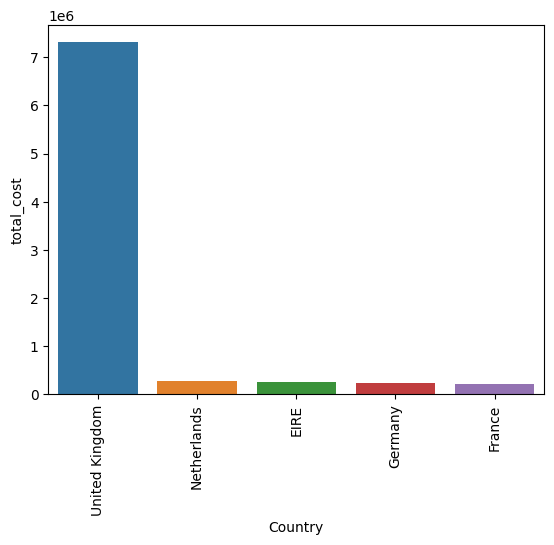

In [ ]:
retail_country= data1.groupby('Country')[['total_cost']].sum().sort_values(by='total_cost', ascending=False).head()
retail_country.reset_index(inplace=True)
sns.barplot(x=retail_country['Country'],y=retail_country['total_cost'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
retail_country

,Country,total_cost
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050


Top 10  Selling Product

In [ ]:
tsp=data1['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
tsp

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


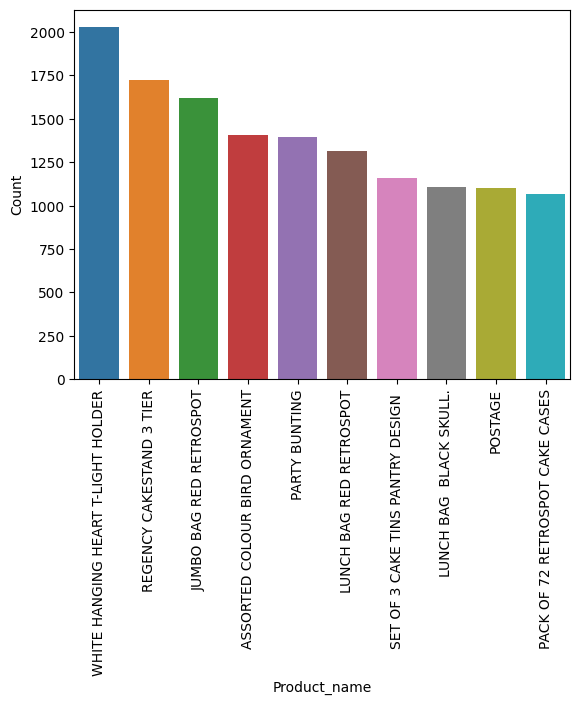

In [ ]:
sns.barplot(x=tsp['Product_name'],y=tsp['Count'])
plt.xticks(rotation=90)
plt.show()

Top 10 frequent Customers

In [ ]:
tfc=data1['CustomerID'].value_counts().reset_index().rename(columns={'index':'Customer_ID','CustomerID':'Count'}).head(10)
tfc

,Customer_ID,Count
0,17841,7847
1,14911,5677
2,14096,5111
3,12748,4596
4,14606,2700
5,15311,2379
6,14646,2080
7,13089,1818
8,13263,1677
9,14298,1637


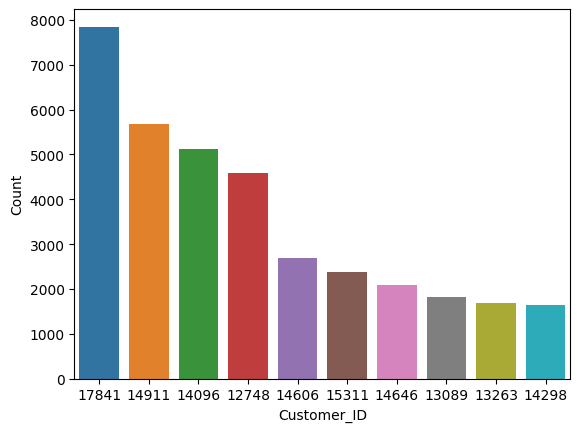

In [ ]:
sns.barplot(y=tfc['Count'],x=tfc['Customer_ID'],order=tfc.sort_values('Count',ascending=False).Customer_ID)
plt.show()

Top 5 Countries with highest customers

In [ ]:
thc=data1.groupby('Country')['CustomerID'].nunique().reset_index().rename(columns={'CustomerID': 'No_of_Unique_Customers'}).sort_values(by='No_of_Unique_Customers',ascending=False).reset_index(drop=True).head()
thc

,Country,No_of_Unique_Customers
0,United Kingdom,3921
1,Germany,94
2,France,87
3,Spain,30
4,Belgium,25


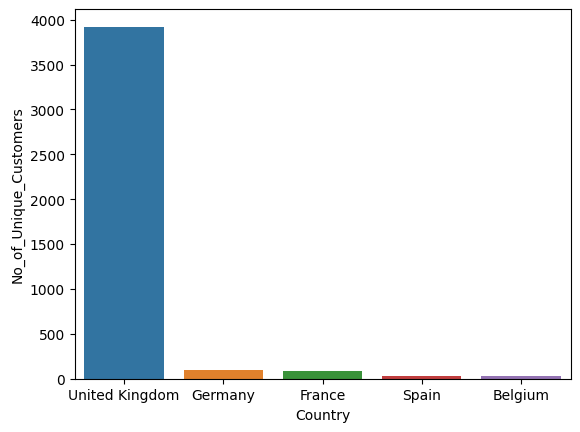

In [ ]:
sns.barplot(y=thc['No_of_Unique_Customers'],x=thc['Country'])
plt.show()

Top 5 Countries with Least customers

In [ ]:
tlc=data1.groupby('Country')['CustomerID'].nunique().reset_index().rename(columns={'CustomerID': 'No_of_Unique_Customers'}).sort_values(by='No_of_Unique_Customers',ascending=True).reset_index(drop=True).head()
tlc

,Country,No_of_Unique_Customers
0,European Community,1
1,Lebanon,1
2,Iceland,1
3,RSA,1
4,Brazil,1


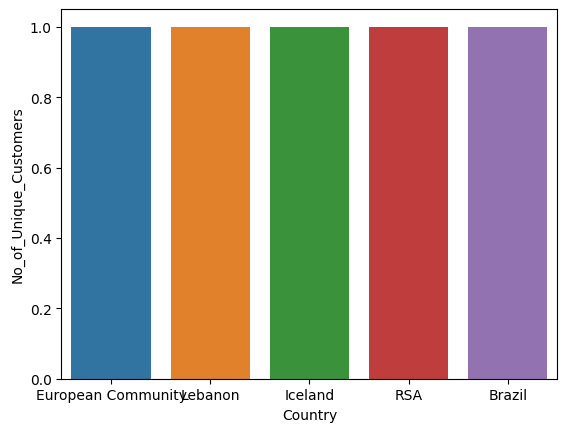

In [ ]:
sns.barplot(y=tlc['No_of_Unique_Customers'],x=tlc['Country'])
plt.show()

Top 5 Countries with Highest No of Transactions

In [ ]:
tcnt=data1.groupby('Country')['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo': 'No_of_Transactions'}).sort_values(by='No_of_Transactions',ascending=False).reset_index(drop=True).head()
tcnt

,Country,No_of_Transactions
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


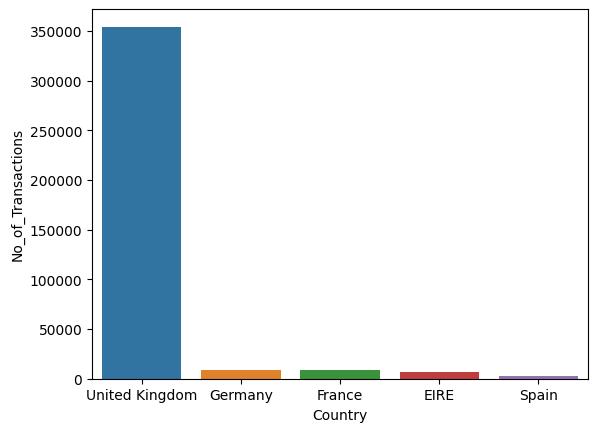

In [ ]:
sns.barplot(y=tcnt['No_of_Transactions'],x=tcnt['Country'])
plt.show()

Top 5 Countries with Least No of  Transactions

In [ ]:
tclt=data1.groupby('Country')['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo': 'No_of_Transactions'}).sort_values(by='No_of_Transactions',ascending=True).reset_index(drop=True).head()
tclt

,Country,No_of_Transactions
0,Saudi Arabia,9
1,Bahrain,17
2,Czech Republic,25
3,Brazil,32
4,Lithuania,35


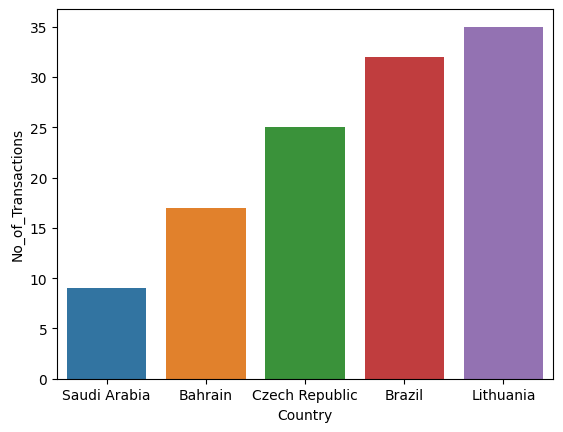

In [ ]:
sns.barplot(y=tclt['No_of_Transactions'],x=tclt['Country'])
plt.show()

Top 5 Countries with based of average revenue

In [ ]:
tcar=data1.groupby('Country')['total_cost'].mean().reset_index().rename(columns={'total_cost': 'Average_Revenue'}).sort_values(by='Average_Revenue',ascending=False).reset_index(drop=True).head()
tcar

,Country,Average_Revenue
0,Netherlands,120.798282
1,Australia,116.895620
2,Japan,116.561900
3,Singapore,95.852658
4,Sweden,85.096075


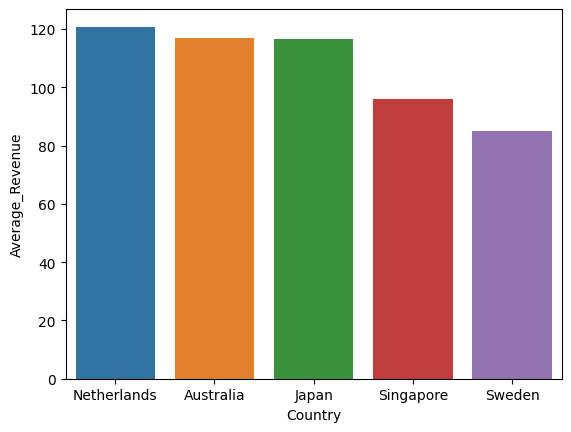

In [ ]:
sns.barplot(y=tcar['Average_Revenue'],x=tcar['Country'])
plt.show()

Top 5 Countries with least average revenue

In [ ]:
tclar=data1.groupby('Country')['total_cost'].mean().reset_index().rename(columns={'total_cost': 'Average_Revenue'}).sort_values(by='Average_Revenue',ascending=True).reset_index(drop=True).head()
tclar

,Country,Average_Revenue
0,Unspecified,10.930615
1,Saudi Arabia,16.213333
2,RSA,17.281207
3,USA,20.002179
4,Belgium,20.283772


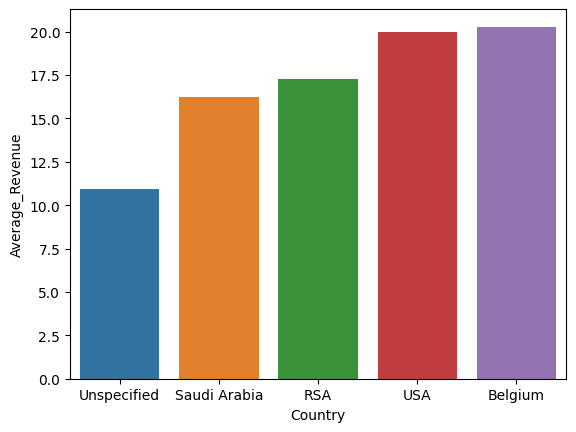

In [ ]:
sns.barplot(y=tclar['Average_Revenue'],x=tclar['Country'])
plt.show()

Top 5 Customers based on average spent amount

In [ ]:
tcas=data1.groupby('CustomerID')['total_cost'].mean().reset_index().rename(columns={'total_cost': 'Average_Amount'}).sort_values(by='Average_Amount',ascending=False).reset_index(drop=True).head()
tcas

,CustomerID,Average_Amount
0,12346,77183.60
1,16446,56157.50
2,15098,13305.50
3,15749,4453.43
4,15195,3861.00


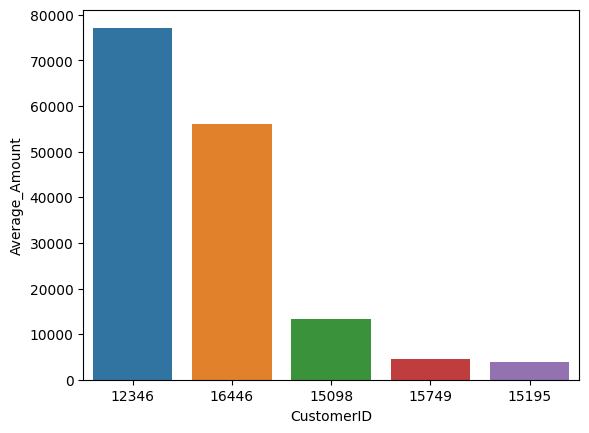

In [ ]:
sns.barplot(y=tcas['Average_Amount'],x=tcas['CustomerID'],order=tcas.sort_values('Average_Amount',ascending=False).CustomerID)
plt.show()

Monthly Sales

In [ ]:
ms=data1.groupby('str_month')['total_cost'].sum().reset_index().rename(columns={'str_month':'Month','total_cost': 'Total_Sales'}).sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)
ms

,Month,Total_Sales
0,November,1161817.380
1,December,1090906.680
2,October,1039318.790
3,September,952838.382
4,May,678594.560
5,June,661213.690
6,August,645343.900
7,July,600091.011
8,March,595500.760
9,January,569445.040


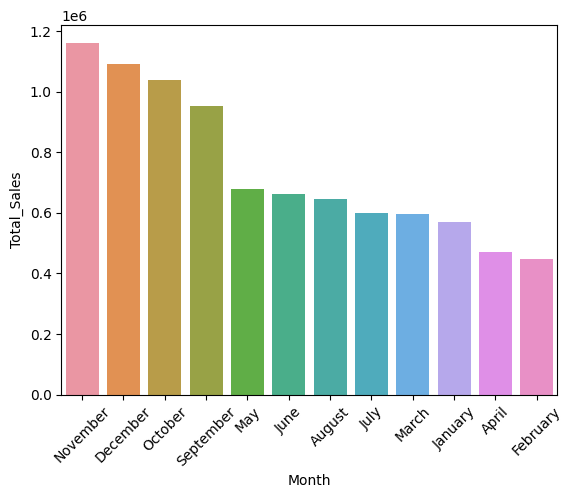

In [ ]:
sns.barplot(y=ms['Total_Sales'],x=ms['Month'])
plt.xticks(rotation=45)
plt.show()

Weekly Sales

In [ ]:
ws=data1.groupby('weekday')['total_cost'].sum().reset_index().rename(columns={'total_cost': 'Total_Sales'}).sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)
ws

,weekday,Total_Sales
0,Thursday,1976859.070
1,Tuesday,1700634.631
2,Wednesday,1588336.170
3,Friday,1485917.401
4,Monday,1367146.411
5,Sunday,792514.221


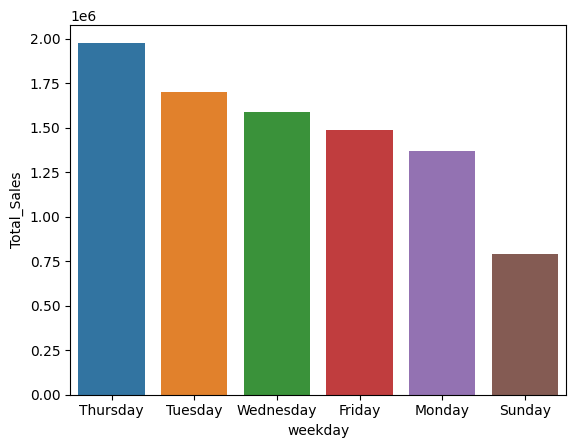

In [ ]:
sns.barplot(y=ws['Total_Sales'],x=ws['weekday'])
plt.show()

Time of the Day Sales

In [ ]:
tod=data1.groupby('timeofday')['total_cost'].sum().reset_index().rename(columns={'total_cost': 'Total_Sales'}).sort_values(by='Total_Sales',ascending=False).reset_index(drop=True)
tod

,timeofday,Total_Sales
0,Evening,4011300.842
1,Morning,3521535.582
2,Afternoon,1378571.480


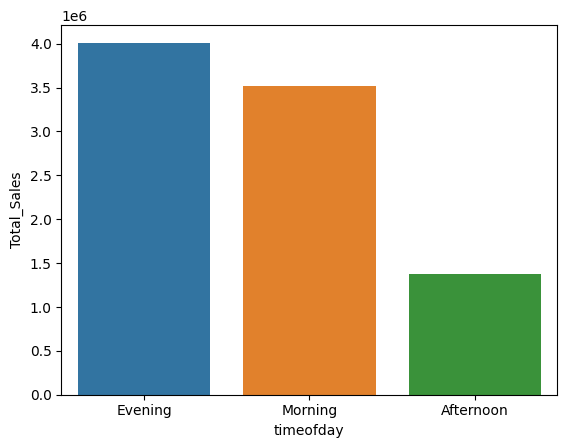

In [ ]:
sns.barplot(y=tod['Total_Sales'],x=tod['timeofday'])
plt.show()

## **RFM Model Analysis**:<br>
### What is RFM?<br>
*RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.*<br>

* **Recency**: How recently did the customer visit our website or how recently did a customer purchase?*

* **Frequency**: How often do they visit or how often do they purchase?*

* **Monetary**: How much revenue we get from their visit or how much do they spend when they purchase?*

###Why it is Needed?<br>
*RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors Recency, Frequency, and Monetary.*

*The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.*

In [ ]:
rfm_data=data1.copy()

Creating 3 Features to be used for Model building <br><br>

Recency : How days before did customer did shopping ?<br>
Frequency : How many times a customer did shopping ?<br>
Monetary  : How much is spent by the Customer ?

In [ ]:
last_day=max(rfm_data['InvoiceDate'])
rfm_data=rfm_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_day - max(x)).days, 'InvoiceNo' : lambda x: len(x), 'total_cost' : lambda x: x.sum()})
rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'total_cost': 'Monetary'}, inplace=True)

rfm_data.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40


Checking for Outliers

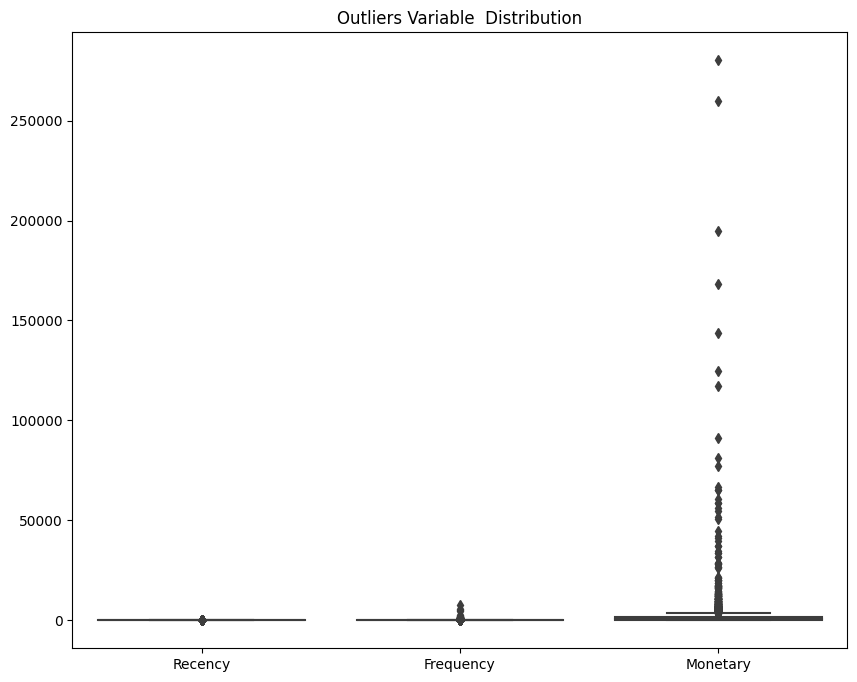

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.boxplot(data = rfm_data[['Recency','Frequency','Monetary']],orient='v')
plt.title("Outliers Variable  Distribution")
plt.show()

In [ ]:
rfm_data['Recency'].describe()

count    4339.000000
mean       91.518322
std       100.009747
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
rfm_data['Frequency'].describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

In [ ]:
rfm_data['Monetary'].describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

Removing Outliers which can seen both statistically and visually above

In [ ]:
  # Removing statistical outliers for Monetary
q1=rfm_data.Monetary.quantile(0.05)
q3=rfm_data.Monetary.quantile(0.95)
IOC=q3-q1
rfm_data=rfm_data[(rfm_data.Monetary >= (q1 - 1.5*IOC)) & (rfm_data.Monetary <= (q3 + 1.5*IOC))]
  # Removing statistical outliers for Frequency
q1=rfm_data.Frequency.quantile(0.05)
q3=rfm_data.Frequency.quantile(0.95)
IOC=q3-q1
rfm_data=rfm_data[(rfm_data.Frequency >= (q1 - 1.5*IOC)) & (rfm_data.Frequency <= (q3 + 1.5*IOC))]
  # Removing statistical outliers for Recency
q1=rfm_data.Recency.quantile(0.05)
q3=rfm_data.Recency.quantile(0.95)
IOC=q3-q1
rfm_data=rfm_data[(rfm_data.Recency >= (q1 - 1.5*IOC)) & (rfm_data.Recency <= (q3 + 1.5*IOC))]

Standardizing the Data

In [ ]:
ss=StandardScaler()
rfm_scaled_data=pd.DataFrame(ss.fit_transform(rfm_data), columns = rfm_data.columns,index=rfm_data.index)

## Finding N-cluster value using Elbow method

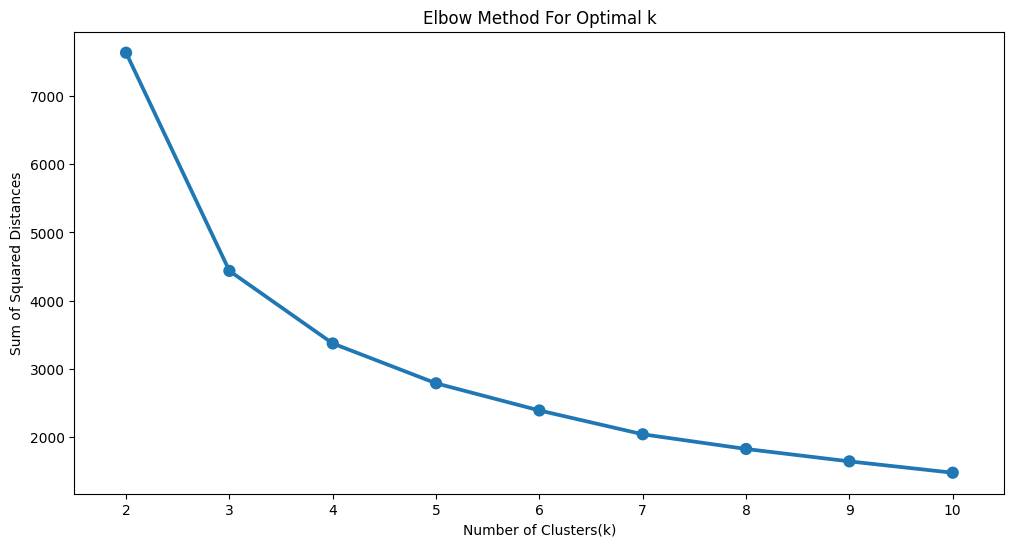

In [ ]:
wcss = {}
score=[]
for i in np.arange(2,11):
  kmeans = KMeans(n_clusters=i,max_iter= 100)
  kmeans.fit(rfm_scaled_data)
  preds = kmeans.fit_predict(rfm_scaled_data)
  wcss[i] = kmeans.inertia_
  score.append(silhouette_score(rfm_scaled_data, preds))

plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
ss={'No of Clusters':np.arange(2,11), 'Silhouette score': score}

In [ ]:
wcss={'No of Clusters':wcss.keys(),'Sum of Squared Distances':wcss.values()}

Finding N-cluster value using Silhouette score method

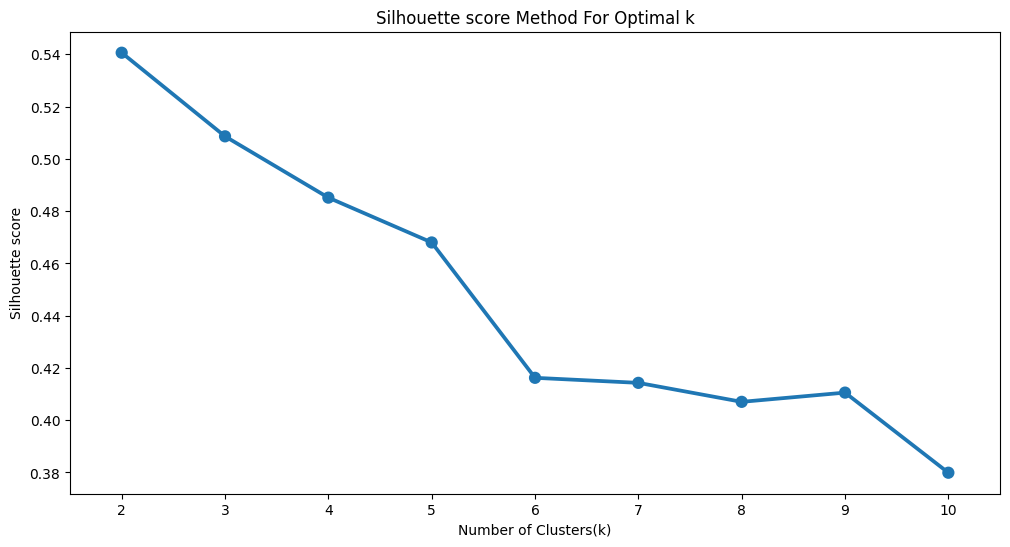

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x =np.arange(2,11), y = score)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score Method For Optimal k')
plt.show()

In [ ]:
pd.DataFrame(wcss)

,No of Clusters,Sum of Squared Distances
0,2,7632.919761
1,3,4437.176786
2,4,3373.871610
3,5,2790.041430
4,6,2392.269903
5,7,2043.241236
6,8,1828.110374
7,9,1646.520639
8,10,1480.225286


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['No of Clusters'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Sum of Squared Distances'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['No of Clusters'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Sum of Squared Distances'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['No of Clusters', 'Sum of Squared Distances']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['No of Clusters', 'Sum of Squared Distances', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['No of Clusters', 'count()', None], **{})
chart

In [ ]:
pd.DataFrame(ss)

,No of Clusters,Silhouette score
0,2,0.540625
1,3,0.508627
2,4,0.485165
3,5,0.468013
4,6,0.416216
5,7,0.414288
6,8,0.407020
7,9,0.410554
8,10,0.379896


## DBSCAN Algorithm

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(rfm_scaled_data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(rfm_scaled_data, labels))

Estimated number of clusters: 2
Estimated number of noise points: 396
Silhouette Coefficient: 0.414


Taking 2 as cluster points and using KMeans

In [ ]:
kmeans = KMeans(n_clusters=2,max_iter= 1000)
kmeans.fit(rfm_scaled_data)
y_clusters = kmeans.fit_predict(rfm_scaled_data)

In [ ]:
rfm_scaled_data[y_clusters == 0]


,Recency,Frequency,Monetary
CustomerID,,,
12347,-0.917872,1.067832,1.645726
12357,-0.608467,0.551607,2.690641
12359,-0.358946,1.735889,2.781446
12362,-0.907891,1.918086,2.150231
12370,-0.428812,0.916001,1.224874
...,...,...,...
18225,-0.907891,1.968697,2.305998
18226,-0.498678,1.675156,2.151233
18229,-0.818064,0.885635,3.279392


In [ ]:
rfm_scaled_data['Cluster']=kmeans.labels_
rfm_scaled_data.head(10)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347,-0.917872,1.067832,1.645726,0
12348,-0.189272,-0.460601,0.262124,1
12349,-0.748198,-0.035474,0.240269,1
12350,2.156221,-0.602310,-0.543361,1
12352,-0.578524,0.085991,0.652411,1
12353,1.098254,-0.733897,-0.678485,1
12354,1.377717,-0.187305,-0.133141,1
12355,1.198062,-0.642798,-0.474532,1
12356,-0.708275,-0.177183,0.820568,1


## Centroid of Clusters

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.69077717,  1.80774603,  1.76819093],
       [ 0.12132954, -0.31751629, -0.31056875]])

## Ploting the Datapoints with respect to their Clusters

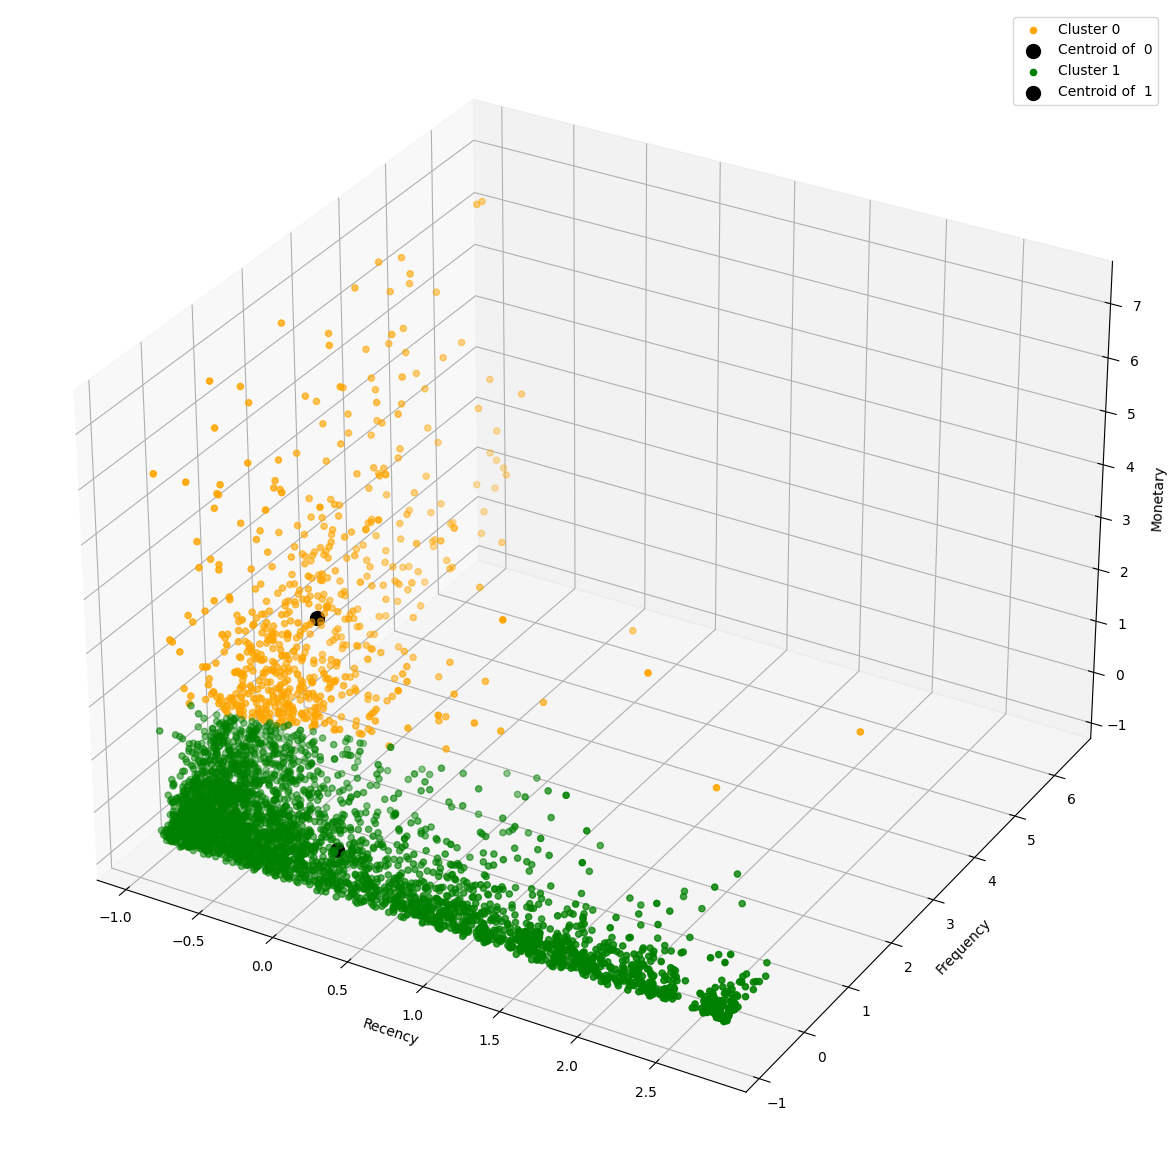

In [ ]:


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

x = np.array(rfm_scaled_data['Recency'])
y = np.array(rfm_scaled_data['Frequency'])
z = np.array(rfm_scaled_data['Monetary'])

# Mapping cluster labels to colors
cluster_colors = {
    0: 'orange',
    1: 'green',
}

# Creating the scatter plot
for cluster_label, color in cluster_colors.items():
    cluster_indices = rfm_scaled_data['Cluster'] == cluster_label
    ax.scatter(x[cluster_indices], y[cluster_indices], z[cluster_indices],
               marker="o", c=color, s=20, label=f'Cluster {cluster_label}')
    ax.scatter(centers[cluster_label][0], centers[cluster_label][1],centers[cluster_label][2],marker="o", color='black', s=100, label=f'Centroid of  {cluster_label}' )

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Adding legend
ax.legend()

plt.show()

In [ ]:
rfm_scaled_data.groupby('Cluster').agg({'Recency': ['mean', 'min', 'max'] ,'Frequency': ['mean', 'min', 'max'] ,'Monetary': ['mean', 'min', 'max'] , })

Recency                     Frequency                      Monetary  \
             mean       min       max      mean       min       max      mean   
Cluster                                                                         
0       -0.690966 -0.927853  2.775032  1.814671 -0.733897  6.412286  1.775512   
1        0.120466 -0.927853  2.794994 -0.316379 -0.764263  1.857354 -0.309551   

                             
              min       max  
Cluster                      
0       -0.228015  7.196028  
1       -0.727492  2.003141